<a href="https://colab.research.google.com/github/jheremy1901/-Investigaci-n-Te-rica/blob/main/Investigaci%C3%B3n_Te%C3%B3rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1. Investigación Teórica

### ¿Qué es una red neuronal artificial?

Una red neuronal artificial  es un modelo de aprendizaje automático inspirado en el funcionamiento del cerebro humano. Está compuesta por capas de neuronas artificiales (nodos) conectadas entre sí, que permiten aprender patrones complejos a partir de los datos.

### ¿Qué es una regresión lineal y cómo se aplica en ML?

La regresión lineal es un método estadístico que busca modelar la relación entre una variable dependiente y una o más variables independientes usando una línea recta. En Machine Learning, se usa para predecir valores continuos, como precios de viviendas, a partir de características como número de habitaciones, superficie, etc.

### ¿Para qué sirve TensorFlow/Keras en el desarrollo de modelos ML?

TensorFlow es una biblioteca de código abierto para computación numérica, y Keras es su API de alto nivel para construir y entrenar modelos de aprendizaje profundo de forma sencilla. Juntas permiten crear modelos neuronales complejos con pocas líneas de código.

### ¿Por qué es importante el control de versiones con GitHub?

GitHub permite llevar un control de los cambios realizados en el proyecto, facilita la colaboración, el seguimiento del progreso y asegura la recuperación de versiones anteriores si es necesario.


In [15]:
!pip install tensorflow keras matplotlib pandas scikit-learn


In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Cargar dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Price"] = data.target

# Vista previa
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


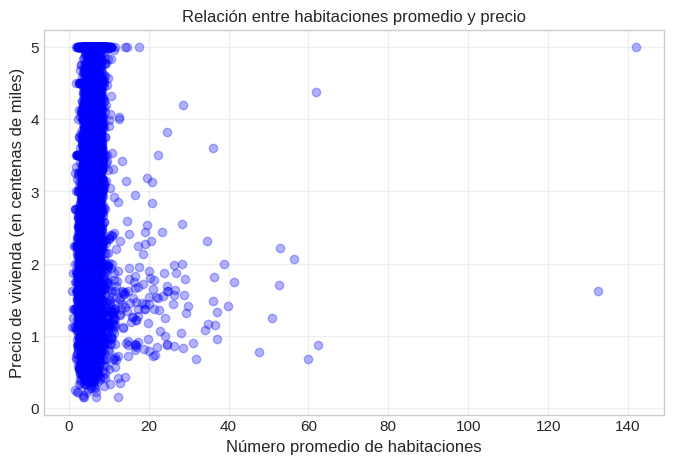

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['AveRooms'], df['Price'], alpha=0.3, color='blue')
plt.title("Relación entre habitaciones promedio y precio")
plt.xlabel("Número promedio de habitaciones")
plt.ylabel("Precio de vivienda (en centenas de miles)")
plt.grid(True)
plt.show()


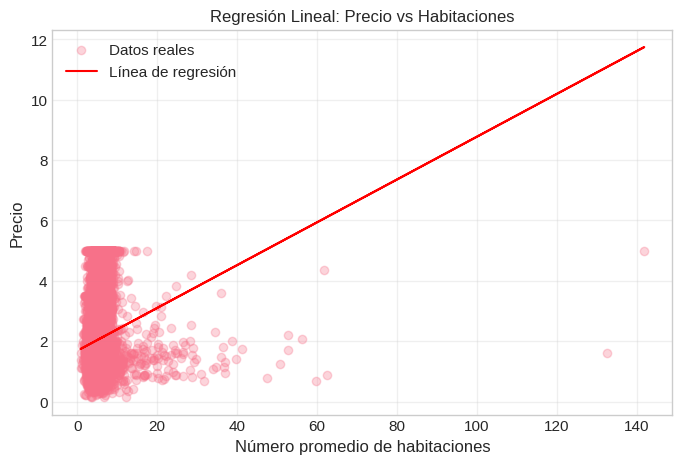

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Seleccionar variable independiente (AveRooms) y dependiente (Price)
X = df[["AveRooms"]]
y = df["Price"]

# Entrenar modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X, y)

# Predicción
y_pred = modelo_rl.predict(X)

# Gráfico de regresión lineal
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.3, label="Datos reales")
plt.plot(X, y_pred, color='red', label="Línea de regresión")
plt.title("Regresión Lineal: Precio vs Habitaciones")
plt.xlabel("Número promedio de habitaciones")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Entradas y salidas
X = df.drop("Price", axis=1)
y = df["Price"]

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir red neuronal
modelo_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

modelo_nn.compile(optimizer='adam', loss='mse')
modelo_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.7582 - val_loss: 0.4642
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4118 - val_loss: 0.4125
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3793 - val_loss: 0.3979
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3584 - val_loss: 0.3972
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3451 - val_loss: 0.3898
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3309 - val_loss: 0.3596
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3135 - val_loss: 0.3545
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3035 - val_loss: 0.3383
Epoch 9/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3186 - val_loss: 0.3398
Epoch 10/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3143 - val_loss: 0.3303
Epoch 11/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2928 - val_loss: 0.3225
Epoch 12/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


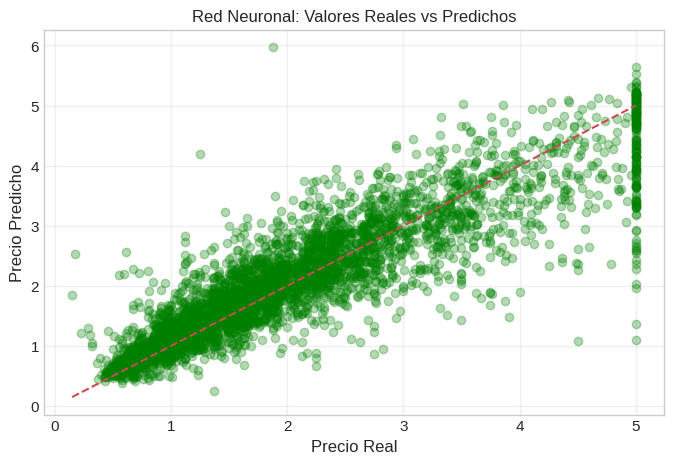

In [20]:
y_pred_nn = modelo_nn.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_nn, alpha=0.3, color='green')
plt.title("Red Neuronal: Valores Reales vs Predichos")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # línea identidad
plt.show()


In [21]:
errores = []

for real, predicho in zip(y_test[:10], y_pred_nn[:10]):
    error = abs(real - predicho[0])
    errores.append(error)
    if error > 1:
        print(f"⚠️ Error alto: Real = {real:.2f}, Predicho = {predicho[0]:.2f}")
    else:
        print(f"✅ Predicción aceptable: Real = {real:.2f}, Predicho = {predicho[0]:.2f}")


✅ Predicción aceptable: Real = 0.48, Predicho = 0.57
✅ Predicción aceptable: Real = 0.46, Predicho = 1.25
✅ Predicción aceptable: Real = 5.00, Predicho = 4.56
✅ Predicción aceptable: Real = 2.19, Predicho = 2.57
✅ Predicción aceptable: Real = 2.78, Predicho = 2.89
✅ Predicción aceptable: Real = 1.59, Predicho = 1.71
✅ Predicción aceptable: Real = 1.98, Predicho = 2.43
✅ Predicción aceptable: Real = 1.57, Predicho = 1.67
✅ Predicción aceptable: Real = 3.40, Predicho = 2.79
✅ Predicción aceptable: Real = 4.47, Predicho = 4.64
